In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx
%matplotlib inline

import geopandas as gpd

In [3]:
def display_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', -1)
    display(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [3]:
df=pd.read_csv('data/City_of_Los_Angeles_Economic_Data.csv')
df.sample(3)

,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source,CD #,Proportions
25780,Employment,Establishment Change By Industry,Durable Goods Manufacturing,Los Angeles City,All,15,2012,2013-01,2013.0,2012-03,07/01/2012,05/08/2015,#,NaN,-5.0,"Employment Development Department, Beacon Econ...",15.0,NaN
4220,Building Permits,Single-family Permit Values,NaN,Los Angeles City,All,13,2011,2011-03,2011.0,2011-01,01/01/2011,05/08/2015,$,Seasonally Adjusted And Smoothed,6810801.4,City Of Los Angeles Department Of Building And...,13.0,NaN
22604,Employment,Establishment Change By Industry,Retail Trade,Los Angeles City,All,3,2012,2012-04,2012.0,2012-02,04/01/2012,05/08/2015,#,NaN,10.0,"Employment Development Department, Beacon Econ...",3.0,NaN


In [117]:
df.drop(*np.where(df.locality != 'Los Angeles City'), inplace=True)

dfs={}
for title, data in df.groupby('indicator'):
    dfs[title]=data.dropna(axis=1, how='all')
    display(dfs[title].sample(3))

,category,indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,value,source,CD #
30567,Wages,Average Annual Wage,Los Angeles City,All,11,2012,2013-01,2013.0,2012-03,07/01/2012,05/08/2015,$,66777.8,Employment Development Department,11.0
30641,Wages,Average Annual Wage,Los Angeles City,All,14,2013,2013-03,2013.0,2013-01,01/01/2013,05/08/2015,$,66032.8,Employment Development Department,14.0
30606,Wages,Average Annual Wage,Los Angeles City,All,13,2010,2010-04,2010.0,2010-02,04/01/2010,05/08/2015,$,53949.3,Employment Development Department,13.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,unit_text,value,source,CD #
5389,Demographics,Average Commute Time,Los Angeles City,All,9,2012,05/08/2015,#,Minutes,30.8,U.s. Census Bureau; Beacon Economics,9.0
5325,Demographics,Average Commute Time,Los Angeles City,All,15,2013,05/08/2015,#,Minutes,27.8,U.s. Census Bureau; Beacon Economics,15.0
5320,Demographics,Average Commute Time,Los Angeles City,All,10,2013,05/08/2015,#,Minutes,31.0,U.s. Census Bureau; Beacon Economics,10.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,unit_text,value,source,CD #
5438,Demographics,Average Public Assistance,Los Angeles City,All,13,2012,05/08/2015,$,Share Of Population 25 Years And Older,5387.0,U.s. Census Bureau; Beacon Economics,13.0
5424,Demographics,Average Public Assistance,Los Angeles City,All,6,2012,05/08/2015,$,Share Of Population 25 Years And Older,4571.3,U.s. Census Bureau; Beacon Economics,6.0
5445,Demographics,Average Public Assistance,Los Angeles City,All,City Total,2013,05/08/2015,$,Share Of Population 25 Years And Older,4464.0,U.s. Census Bureau; Beacon Economics,NaN


,category,indicator,locality,gender,fiscal_year,as_of_date,unit_of_measure,value,source
28233,Hotels,Daily Rate,Los Angeles City,All,2008,05/08/2015,$,167.4,Pkf Consulting
28238,Hotels,Daily Rate,Los Angeles City,All,2013,05/08/2015,$,179.9,Pkf Consulting
28236,Hotels,Daily Rate,Los Angeles City,All,2011,05/08/2015,$,160.5,Pkf Consulting


,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,unit_text,value,source,CD #
5451,Demographics,Educational Attainment,Bachelor's Degree,Los Angeles City,Female,1,2013,05/08/2015,%,Share Of Population 25 Years And Older,17.3,U.s. Census Bureau; Beacon Economics,1.0
5338,Demographics,Educational Attainment,High School,Los Angeles City,All,City Total,2013,05/08/2015,%,NaN,74.6,U.s. Census Bureau; Beacon Economics,NaN
5335,Demographics,Educational Attainment,High School,Los Angeles City,All,15,2013,05/08/2015,%,NaN,66.1,U.s. Census Bureau; Beacon Economics,15.0


,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
5806,Demographics,Educational Attainment By Gender,High School,Los Angeles City,Female,13,2013,05/08/2015,#,15140.8,U.s. Census Bureau; Beacon Economics,13.0
6042,Demographics,Educational Attainment By Gender,Some College,Los Angeles City,All,12,2013,05/08/2015,#,44955.7,U.s. Census Bureau; Beacon Economics,12.0
6059,Demographics,Educational Attainment By Gender,Bachelor's Degree,Los Angeles City,All,City Total,2013,05/08/2015,#,812940.0,U.s. Census Bureau; Beacon Economics,NaN


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
5341,Demographics,Employed Workers,Los Angeles City,All,9,2012,05/08/2015,#,93760.6,U.s. Census Bureau; Beacon Economics,9.0
6070,Demographics,Employed Workers,Los Angeles City,All,2,2012,05/08/2015,#,126715.9,U.s. Census Bureau; Beacon Economics,2.0
6072,Demographics,Employed Workers,Los Angeles City,All,3,2012,05/08/2015,#,121871.4,U.s. Census Bureau; Beacon Economics,3.0


,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source,CD #
12941,Employment,Employment By Establishment Size,Less Than 50 Employees,Los Angeles City,All,8,2012,2012-03,2012.0,2012-01,01/01/2012,05/08/2015,#,Seasonally Adjusted,13126.5,"Employment Development Department, Beacon Econ...",8.0
13033,Employment,Employment By Establishment Size,50 To 250 Employees,Los Angeles City,All,10,2010,2010-03,2010.0,2010-01,01/01/2010,05/08/2015,#,Seasonally Adjusted,17483.7,"Employment Development Department, Beacon Econ...",10.0
13030,Employment,Employment By Establishment Size,50 To 250 Employees,Los Angeles City,All,10,2009,2010-01,2010.0,2009-03,07/01/2009,05/08/2015,#,Seasonally Adjusted,16348.6,"Employment Development Department, Beacon Econ...",10.0


,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source,CD #
14701,Employment,Employment By Establishment Wage,"$25,000 To $50,000",Los Angeles City,All,13,2008,2008-03,2008.0,2008-01,01/01/2008,05/08/2015,#,Seasonally Adjusted,3916.1,"Employment Development Department, Beacon Econ...",13.0
15016,Employment,Employment By Establishment Wage,"$25,000 To $50,000",Los Angeles City,All,City Total,2013,2014-01,2014.0,2013-03,NaN,05/08/2015,#,Seasonally Adjusted,66638.4,"Employment Development Department, Beacon Econ...",NaN
14252,Employment,Employment By Establishment Wage,"$50,000 To $100,000",Los Angeles City,All,8,2011,2012-02,2012.0,2011-04,10/01/2011,05/08/2015,#,Seasonally Adjusted,1856.4,"Employment Development Department, Beacon Econ...",8.0


,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source,CD #
16653,Employment,Employment By Industry,"Prof, Sci, Tech, And Management",Los Angeles City,All,11,2008,2008-04,2008.0,2008-02,04/01/2008,05/08/2015,#,Seasonally Adjusted,20518.6,"Employment Development Department, Beacon Econ...",11.0
21139,Employment,Employment By Industry,"Prof, Sci, Tech, And Management",Los Angeles City,All,6,2013,2013-04,2013.0,2013-02,04/01/2013,05/08/2015,#,Seasonally Adjusted,3430.0,"Employment Development Department, Beacon Econ...",6.0
16763,Employment,Employment By Industry,Other Services,Los Angeles City,All,13,2008,2008-04,2008.0,2008-02,04/01/2008,05/08/2015,#,Seasonally Adjusted,4268.4,"Employment Development Department, Beacon Econ...",13.0


,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
6117,Demographics,Employment By Occupation,Sales And Office,Los Angeles City,All,9,2012,05/08/2015,#,21172.2,U.s. Census Bureau; Beacon Economics,9.0
6235,Demographics,Employment By Occupation,"Management, Business, Science, And Arts",Los Angeles City,All,City Total,2013,05/08/2015,#,656383.0,U.s. Census Bureau; Beacon Economics,NaN
6078,Demographics,Employment By Occupation,Service,Los Angeles City,All,1,2012,05/08/2015,#,29437.2,U.s. Census Bureau; Beacon Economics,1.0


,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
6513,Demographics,Employment By Occupation By Gender,"Natural Resources, Construction, And Maintenance",Los Angeles City,Female,14,2013,05/08/2015,#,220.3,U.s. Census Bureau; Beacon Economics,14.0
6363,Demographics,Employment By Occupation By Gender,Service,Los Angeles City,Female,6,2012,05/08/2015,#,19782.1,U.s. Census Bureau; Beacon Economics,6.0
6261,Demographics,Employment By Occupation By Gender,Sales And Office,Los Angeles City,Male,1,2013,05/08/2015,#,11129.2,U.s. Census Bureau; Beacon Economics,1.0


,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,value,source,CD #
24097,Employment,Establishment Change By Industry,Education,Los Angeles City,All,9,2009,2010-02,2010.0,2009-04,10/01/2009,05/08/2015,#,2.0,"Employment Development Department, Beacon Econ...",9.0
22856,Employment,Establishment Change By Industry,"Prof, Sci, Tech, And Management",Los Angeles City,All,4,2010,2010-03,2010.0,2010-01,01/01/2010,05/08/2015,#,-87.0,"Employment Development Department, Beacon Econ...",4.0
22132,Employment,Establishment Change By Industry,Education,Los Angeles City,All,2,2009,2009-04,2009.0,2009-02,04/01/2009,05/08/2015,#,4.0,"Employment Development Department, Beacon Econ...",2.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
6477,Demographics,Housing Units,Los Angeles City,All,City Total,2012,05/08/2015,#,1429433.0,U.s. Census Bureau; Beacon Economics,NaN
6608,Demographics,Housing Units,Los Angeles City,All,11,2013,05/08/2015,#,132069.2,U.s. Census Bureau; Beacon Economics,11.0
6616,Demographics,Housing Units,Los Angeles City,All,15,2013,05/08/2015,#,85130.6,U.s. Census Bureau; Beacon Economics,15.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
6619,Demographics,Housing Vacancy Rate,Los Angeles City,All,7,2013,05/08/2015,%,5.0,U.s. Census Bureau; Beacon Economics,7.0
6625,Demographics,Housing Vacancy Rate,Los Angeles City,All,10,2013,05/08/2015,%,5.8,U.s. Census Bureau; Beacon Economics,10.0
6627,Demographics,Housing Vacancy Rate,Los Angeles City,All,11,2013,05/08/2015,%,6.5,U.s. Census Bureau; Beacon Economics,11.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
6666,Demographics,Mean Earnings,Los Angeles City,All,14,2012,05/08/2015,$,55611.2,U.s. Census Bureau; Beacon Economics,14.0
6660,Demographics,Mean Earnings,Los Angeles City,All,11,2012,05/08/2015,$,111741.8,U.s. Census Bureau; Beacon Economics,11.0
6641,Demographics,Mean Earnings,Los Angeles City,All,1,2013,05/08/2015,$,59511.6,U.s. Census Bureau; Beacon Economics,1.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
6690,Demographics,Median Age,Los Angeles City,All,9,2012,05/08/2015,#,29.0,U.s. Census Bureau; Beacon Economics,9.0
6694,Demographics,Median Age,Los Angeles City,All,11,2012,05/08/2015,#,38.4,U.s. Census Bureau; Beacon Economics,11.0
6695,Demographics,Median Age,Los Angeles City,All,11,2013,05/08/2015,#,37.6,U.s. Census Bureau; Beacon Economics,11.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
6714,Demographics,Median Age By Gender,Los Angeles City,Male,2,2012,05/08/2015,#,34.8,U.s. Census Bureau; Beacon Economics,2.0
6718,Demographics,Median Age By Gender,Los Angeles City,Male,3,2012,05/08/2015,#,36.9,U.s. Census Bureau; Beacon Economics,3.0
6767,Demographics,Median Age By Gender,Los Angeles City,Male,15,2013,05/08/2015,#,31.3,U.s. Census Bureau; Beacon Economics,15.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
6802,Demographics,Median Household Income,Los Angeles City,All,14,2012,05/08/2015,$,35110.5,U.s. Census Bureau; Beacon Economics,14.0
6799,Demographics,Median Household Income,Los Angeles City,All,12,2013,05/08/2015,$,66792.3,U.s. Census Bureau; Beacon Economics,12.0
6783,Demographics,Median Household Income,Los Angeles City,All,4,2013,05/08/2015,$,58888.2,U.s. Census Bureau; Beacon Economics,4.0


,category,indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source,CD #
695,Building Permits,Multi-family Permit Values,Los Angeles City,All,City Total,2013,2013-03,2013.0,2013-01,01/01/2013,05/08/2015,$,Seasonally Adjusted And Smoothed,176668057.2,City Of Los Angeles Department Of Building And...,NaN
125,Building Permits,Multi-family Permit Values,Los Angeles City,All,3,2013,2013-03,2013.0,2013-01,01/01/2013,05/08/2015,$,Seasonally Adjusted And Smoothed,65089913.7,City Of Los Angeles Department Of Building And...,3.0
336,Building Permits,Multi-family Permit Values,Los Angeles City,All,8,2011,2011-03,2011.0,2011-01,01/01/2011,05/08/2015,$,Seasonally Adjusted And Smoothed,582436.9,City Of Los Angeles Department Of Building And...,8.0


,category,indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source,CD #
967,Building Permits,Multi-family Permits,Los Angeles City,All,5,2013,2014-02,2014.0,2013-04,10/01/2013,05/08/2015,#,Seasonally Adjusted And Smoothed,29.9,City Of Los Angeles Department Of Building And...,5.0
911,Building Permits,Multi-family Permits,Los Angeles City,All,4,2010,2010-04,2010.0,2010-02,04/01/2010,05/08/2015,#,Seasonally Adjusted And Smoothed,17.9,City Of Los Angeles Department Of Building And...,4.0
943,Building Permits,Multi-family Permits,Los Angeles City,All,5,2007,2008-02,2008.0,2007-04,10/01/2007,05/08/2015,#,Seasonally Adjusted And Smoothed,123.6,City Of Los Angeles Department Of Building And...,5.0


,category,indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source,CD #
1952,Building Permits,New Commercial Permit Values,Los Angeles City,All,12,2009,2010-01,2010.0,2009-03,07/01/2009,05/08/2015,$,Seasonally Adjusted And Smoothed,11245.9,City Of Los Angeles Department Of Building And...,12.0
1638,Building Permits,New Commercial Permit Values,Los Angeles City,All,5,2004,2005-02,2005.0,2004-04,10/01/2004,05/08/2015,$,Seasonally Adjusted And Smoothed,22175222.2,City Of Los Angeles Department Of Building And...,5.0
2045,Building Permits,New Commercial Permit Values,Los Angeles City,All,14,2011,2012-01,2012.0,2011-03,07/01/2011,05/08/2015,$,Seasonally Adjusted And Smoothed,7786519.6,City Of Los Angeles Department Of Building And...,14.0


,category,indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source,CD #
2809,Building Permits,Non-residential Alteration Permit Values,Los Angeles City,All,14,2012,2013-01,2013.0,2012-03,07/01/2012,05/08/2015,$,Seasonally Adjusted And Smoothed,6293216.6,City Of Los Angeles Department Of Building And...,14.0
2570,Building Permits,Non-residential Alteration Permit Values,Los Angeles City,All,9,2008,2008-03,2008.0,2008-01,01/01/2008,05/08/2015,$,Seasonally Adjusted And Smoothed,828342.5,City Of Los Angeles Department Of Building And...,9.0
2832,Building Permits,Non-residential Alteration Permit Values,Los Angeles City,All,15,2007,2008-01,2008.0,2007-03,07/01/2007,05/08/2015,$,Seasonally Adjusted And Smoothed,670240.0,City Of Los Angeles Department Of Building And...,15.0


,category,indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source,CD #
3146,Building Permits,Non-residential Permit Values,Los Angeles City,All,6,2004,2004-04,2004.0,2004-02,04/01/2004,05/08/2015,$,Seasonally Adjusted And Smoothed,2601343.1,City Of Los Angeles Department Of Building And...,6.0
3096,Building Permits,Non-residential Permit Values,Los Angeles City,All,4,2012,2013-02,2013.0,2012-04,10/01/2012,05/08/2015,$,Seasonally Adjusted And Smoothed,4563968.2,City Of Los Angeles Department Of Building And...,4.0
3587,Building Permits,Non-residential Permit Values,Los Angeles City,All,City Total,2007,2007-04,2007.0,2007-02,04/01/2007,05/08/2015,$,Seasonally Adjusted And Smoothed,197653697.6,City Of Los Angeles Department Of Building And...,NaN


,category,indicator,locality,gender,fiscal_year,as_of_date,unit_of_measure,value,source
28250,Hotels,Occupancy,Los Angeles City,All,2006,05/08/2015,%,76.2,Pkf Consulting
28251,Hotels,Occupancy,Los Angeles City,All,2007,05/08/2015,%,76.6,Pkf Consulting
28240,Hotels,Occupancy,Los Angeles City,All,2014,05/08/2015,%,79.2,Pkf Consulting


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,unit_text,value,source,CD #
6831,Demographics,Owner-occupied Housing,Los Angeles City,All,11,2013,05/08/2015,%,Share Of All Occupied Housing Units,42.9,U.s. Census Bureau; Beacon Economics,11.0
6833,Demographics,Owner-occupied Housing,Los Angeles City,All,12,2013,05/08/2015,%,Share Of All Occupied Housing Units,64.4,U.s. Census Bureau; Beacon Economics,12.0
6823,Demographics,Owner-occupied Housing,Los Angeles City,All,7,2013,05/08/2015,%,Share Of All Occupied Housing Units,59.8,U.s. Census Bureau; Beacon Economics,7.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
6869,Demographics,Population,Los Angeles City,All,13,2013,05/08/2015,#,252300.2,U.s. Census Bureau; Beacon Economics,13.0
6856,Demographics,Population,Los Angeles City,All,7,2012,05/08/2015,#,269189.0,U.s. Census Bureau; Beacon Economics,7.0
6871,Demographics,Population,Los Angeles City,All,14,2013,05/08/2015,#,236857.6,U.s. Census Bureau; Beacon Economics,14.0


,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #,Proportions
8201,Demographics,Population By Age By Gender,15 To 17 Years,Los Angeles City,Male,12,2013,05/08/2015,#,6312.9,U.s. Census Bureau; Beacon Economics,12.0,NaN
7794,Demographics,Population By Age By Gender,40 To 44 Years,Los Angeles City,Male,3,2013,05/08/2015,#,10844.9,U.s. Census Bureau; Beacon Economics,3.0,NaN
7313,Demographics,Population By Age By Gender,67 To 69 Years,Los Angeles City,Female,10,2012,05/08/2015,#,3221.5,U.s. Census Bureau; Beacon Economics,10.0,1.32%


,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #,Proportions
8717,Demographics,Population By Age Group,15 To 19 Years,Los Angeles City,All,4,2013,05/08/2015,#,7746.0,U.s. Census Bureau; Beacon Economics,4.0,1.80%
8469,Demographics,Population By Age Group,20 To 24 Years,Los Angeles City,All,2,2012,05/08/2015,#,25339.0,U.s. Census Bureau; Beacon Economics,2.0,6.42%
8795,Demographics,Population By Age Group,Under 5 Years,Los Angeles City,All,9,2013,05/08/2015,#,22816.8,U.s. Census Bureau; Beacon Economics,9.0,5.90%


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #,Proportions
8945,Demographics,Population By Gender,Los Angeles City,Male,6,2013,05/08/2015,#,127716.8,U.s. Census Bureau; Beacon Economics,6.0,49.40%
8907,Demographics,Population By Gender,Los Angeles City,Male,4,2012,05/08/2015,#,128441.5,U.s. Census Bureau; Beacon Economics,4.0,51.07%
8930,Demographics,Population By Gender,Los Angeles City,Female,City Total,2012,05/08/2015,#,1939408.0,U.s. Census Bureau; Beacon Economics,NaN,50.27%


,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
9203,Demographics,Population By Income Bracket,"$65,000 To $74,999",Los Angeles City,All,12,2012,NaN,#,4555.7,U.s. Census Bureau; Beacon Economics,12.0
9287,Demographics,Population By Income Bracket,"Less Than $2,499",Los Angeles City,All,City Total,2012,NaN,#,52224.0,U.s. Census Bureau; Beacon Economics,NaN
9339,Demographics,Population By Income Bracket,"$5,000 To $7,499",Los Angeles City,All,2,2013,NaN,#,3854.5,U.s. Census Bureau; Beacon Economics,2.0


,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
10618,Demographics,Population By Income Bracket By Gender,"$5,000 To $7,499",Los Angeles City,Male,7,2013,05/08/2015,#,2947.4,U.s. Census Bureau; Beacon Economics,7.0
9679,Demographics,Population By Income Bracket By Gender,"$65,000 To $74,999",Los Angeles City,Female,1,2012,05/08/2015,#,1219.9,U.s. Census Bureau; Beacon Economics,1.0
9894,Demographics,Population By Income Bracket By Gender,"$75,000 To $99,999",Los Angeles City,Female,6,2012,05/08/2015,#,1817.5,U.s. Census Bureau; Beacon Economics,6.0


,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
11193,Demographics,Population By Race,Black Or African American,Los Angeles City,All,15,2013,05/08/2015,#,32675.8,U.s. Census Bureau; Beacon Economics,15.0
11114,Demographics,Population By Race,Black Or African American,Los Angeles City,All,7,2012,05/08/2015,#,9577.0,U.s. Census Bureau; Beacon Economics,7.0
11081,Demographics,Population By Race,Asian,Los Angeles City,All,4,2013,05/08/2015,#,32893.4,U.s. Census Bureau; Beacon Economics,4.0


,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
11263,Demographics,Population By Race By Gender,White,Los Angeles City,Female,9,2012,05/08/2015,#,37854.7,U.s. Census Bureau; Beacon Economics,9.0
11404,Demographics,Population By Race By Gender,American Indian And Alaska Native,Los Angeles City,Female,4,2013,05/08/2015,#,433.0,U.s. Census Bureau; Beacon Economics,4.0
11381,Demographics,Population By Race By Gender,Black Or African American,Los Angeles City,Male,City Total,2012,05/08/2015,#,168854.0,U.s. Census Bureau; Beacon Economics,NaN


,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
11639,Demographics,Proportion Of Households By Income Bracket,"$25,000 To $50,000",Los Angeles City,All,11,2012,05/08/2015,%,16.2,U.s. Census Bureau; Beacon Economics,11.0
11656,Demographics,Proportion Of Households By Income Bracket,"$25,000 To $50,000",Los Angeles City,All,13,2013,05/08/2015,%,27.6,U.s. Census Bureau; Beacon Economics,13.0
11619,Demographics,Proportion Of Households By Income Bracket,"Less Than $25,000",Los Angeles City,All,8,2012,05/08/2015,%,43.4,U.s. Census Bureau; Beacon Economics,8.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
11719,Demographics,Share Of Commuters Using Public Transit,Los Angeles City,All,13,2012,05/08/2015,%,22.5,U.s. Census Bureau; Beacon Economics,13.0
11715,Demographics,Share Of Commuters Using Public Transit,Los Angeles City,All,11,2012,05/08/2015,%,4.4,U.s. Census Bureau; Beacon Economics,11.0
11698,Demographics,Share Of Commuters Using Public Transit,Los Angeles City,All,2,2013,05/08/2015,%,9.2,U.s. Census Bureau; Beacon Economics,2.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,unit_text,value,source,CD #
11805,Demographics,Share Of Employed Workers By Occupation,Los Angeles City,All,8,2013,05/08/2015,%,Share Of District/city/county Employed Workers,17.3,U.s. Census Bureau; Beacon Economics,8.0
11743,Demographics,Share Of Employed Workers By Occupation,Los Angeles City,All,2,2012,05/08/2015,%,Share Of District/city/county Employed Workers,35.3,U.s. Census Bureau; Beacon Economics,2.0
11764,Demographics,Share Of Employed Workers By Occupation,Los Angeles City,All,4,2012,05/08/2015,%,Share Of District/city/county Employed Workers,57.9,U.s. Census Bureau; Beacon Economics,4.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
11907,Demographics,Share Of Households In Snap,Los Angeles City,All,City Total,2013,05/08/2015,%,9.8,U.s. Census Bureau; Beacon Economics,NaN
10421,Demographics,Share Of Households In Snap,Los Angeles City,All,14,2013,05/08/2015,%,14.8,U.s. Census Bureau; Beacon Economics,14.0
9961,Demographics,Share Of Households In Snap,Los Angeles City,All,11,2013,05/08/2015,%,1.7,U.s. Census Bureau; Beacon Economics,11.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
11918,Demographics,Share Of Households That Moved In Before 2000,Los Angeles City,All,5,2012,05/08/2015,%,27.1,U.s. Census Bureau; Beacon Economics,5.0
11940,Demographics,Share Of Households That Moved In Before 2000,Los Angeles City,All,City Total,2013,05/08/2015,%,28.8,U.s. Census Bureau; Beacon Economics,NaN
11914,Demographics,Share Of Households That Moved In Before 2000,Los Angeles City,All,3,2012,05/08/2015,%,34.8,U.s. Census Bureau; Beacon Economics,3.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
11955,Demographics,Share Of Households With Public Assistance,Los Angeles City,All,7,2012,05/08/2015,%,4.6,U.s. Census Bureau; Beacon Economics,7.0
11957,Demographics,Share Of Households With Public Assistance,Los Angeles City,All,8,2012,05/08/2015,%,9.8,U.s. Census Bureau; Beacon Economics,8.0
11973,Demographics,Share Of Households With Public Assistance,Los Angeles City,All,City Total,2012,05/08/2015,%,4.7,U.s. Census Bureau; Beacon Economics,NaN


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
12003,Demographics,Share Of Housing Units Built Before 2000,Los Angeles City,All,14,2012,05/08/2015,%,91.7,U.s. Census Bureau; Beacon Economics,14.0
12006,Demographics,Share Of Housing Units Built Before 2000,Los Angeles City,All,15,2013,05/08/2015,%,94.2,U.s. Census Bureau; Beacon Economics,15.0
11982,Demographics,Share Of Housing Units Built Before 2000,Los Angeles City,All,3,2013,05/08/2015,%,91.9,U.s. Census Bureau; Beacon Economics,3.0


,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,unit_text,value,source,CD #
12193,Demographics,Share Of Population By Race,NaN,Los Angeles City,All,13,2013,05/08/2015,%,Share Of District/city/county Population,137435.2,U.s. Census Bureau; Beacon Economics,13.0
12146,Demographics,Share Of Population By Race,Other,Los Angeles City,All,10,2013,05/08/2015,%,Share Of District/city/county Population,6412.6,U.s. Census Bureau; Beacon Economics,10.0
12065,Demographics,Share Of Population By Race,NaN,Los Angeles City,All,4,2012,05/08/2015,%,Share Of District/city/county Population,39076.6,U.s. Census Bureau; Beacon Economics,4.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
12271,Demographics,Share Of Total Population Under 18 Years Of Age,Los Angeles City,All,11,2013,05/08/2015,%,16.6,U.s. Census Bureau; Beacon Economics,11.0
12253,Demographics,Share Of Total Population Under 18 Years Of Age,Los Angeles City,All,2,2012,05/08/2015,%,21.5,U.s. Census Bureau; Beacon Economics,2.0
12264,Demographics,Share Of Total Population Under 18 Years Of Age,Los Angeles City,All,7,2013,05/08/2015,%,24.9,U.s. Census Bureau; Beacon Economics,7.0


,category,indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source,CD #
4162,Building Permits,Single-family Permit Values,Los Angeles City,All,12,2007,2007-03,2007.0,2007-01,01/01/2007,05/08/2015,$,Seasonally Adjusted And Smoothed,7988455.3,City Of Los Angeles Department Of Building And...,12.0
4123,Building Permits,Single-family Permit Values,Los Angeles City,All,11,2007,2008-02,2008.0,2007-04,10/01/2007,05/08/2015,$,Seasonally Adjusted And Smoothed,16271267.8,City Of Los Angeles Department Of Building And...,11.0
3978,Building Permits,Single-family Permit Values,Los Angeles City,All,8,2004,2004-04,2004.0,2004-02,04/01/2004,05/08/2015,$,Seasonally Adjusted And Smoothed,4303286.6,City Of Los Angeles Department Of Building And...,8.0


,category,indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source,CD #
4882,Building Permits,Single-family Permits,Los Angeles City,All,11,2014,2014-03,2014.0,2014-01,01/01/2014,05/08/2015,#,Seasonally Adjusted And Smoothed,59.3,City Of Los Angeles Department Of Building And...,11.0
4997,Building Permits,Single-family Permits,Los Angeles City,All,14,2010,2011-01,2011.0,2010-03,07/01/2010,05/08/2015,#,Seasonally Adjusted And Smoothed,10.8,City Of Los Angeles Department Of Building And...,14.0
4785,Building Permits,Single-family Permits,Los Angeles City,All,9,2011,2012-02,2012.0,2011-04,10/01/2011,05/08/2015,#,Seasonally Adjusted And Smoothed,5.6,City Of Los Angeles Department Of Building And...,9.0


,category,indicator,sub_indicator,locality,gender,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source
28469,Taxable Sales,Taxable Sales,Total All Outlets,Los Angeles City,All,2002,2002-03,2002.0,2002-01,01/01/2002,05/08/2015,$,"Thousands, Seasonally Adjusted",7750456.0,Board Of Equalization
28506,Taxable Sales,Taxable Sales,Total All Outlets,Los Angeles City,All,2011,2011-04,2011.0,2011-02,04/01/2011,05/08/2015,$,"Thousands, Seasonally Adjusted",9391862.7,Board Of Equalization
28516,Taxable Sales,Taxable Sales,Total All Outlets,Los Angeles City,All,2013,2014-02,2014.0,2013-04,10/01/2013,05/08/2015,$,"Thousands, Seasonally Adjusted",10621358.3,Board Of Equalization


,category,indicator,sub_indicator,locality,gender,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source
29148,Taxable Sales,Taxable Sales By Sector,Food And Beverage Stores,Los Angeles City,All,2000,2000-03,2000.0,2000-01,01/01/2000,05/08/2015,$,"Thousands, Seasonally Adjusted",410099.3,Board Of Equalization
28637,Taxable Sales,Taxable Sales By Sector,All Other Outlets,Los Angeles City,All,2002,2002-03,2002.0,2002-01,01/01/2002,05/08/2015,$,"Thousands, Seasonally Adjusted",1965574.6,Board Of Equalization
29026,Taxable Sales,Taxable Sales By Sector,Clothing And Clothing Accessories Stores,Los Angeles City,All,2012,2013-02,2013.0,2012-04,10/01/2012,05/08/2015,$,"Thousands, Seasonally Adjusted",741335.9,Board Of Equalization


,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source,CD #
27781,Employment,Total Employment,Total All Industries,Los Angeles City,All,8,2008,2008-04,2008.0,2008-02,04/01/2008,05/08/2015,#,Seasonally Adjusted,19542.0,"Employment Development Department, Beacon Econ...",8.0
27797,Employment,Total Employment,Total All Industries,Los Angeles City,All,8,2012,2012-04,2012.0,2012-02,04/01/2012,05/08/2015,#,Seasonally Adjusted,20867.9,"Employment Development Department, Beacon Econ...",8.0
27874,Employment,Total Employment,Total All Industries,Los Angeles City,All,11,2013,2014-01,2014.0,2013-03,07/01/2013,05/08/2015,#,Seasonally Adjusted,150255.9,"Employment Development Department, Beacon Econ...",11.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
28135,Gross Receipts,Total Gross Receipts,Los Angeles City,All,11,2012,05/08/2015,$,41770759.5,City Of Los Angeles Office Of Finance,11.0
28182,Gross Receipts,Total Gross Receipts,Los Angeles City,All,4,2012,05/08/2015,$,27861992.3,City Of Los Angeles Office Of Finance,4.0
28200,Gross Receipts,Total Gross Receipts,Los Angeles City,All,7,2006,05/08/2015,$,8146197.0,City Of Los Angeles Office Of Finance,7.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
9654,Demographics,Unemployment Rate,Los Angeles City,All,7,2013,05/08/2015,%,12.0,U.s. Census Bureau; Beacon Economics,7.0
9825,Demographics,Unemployment Rate,Los Angeles City,All,8,2012,05/08/2015,%,16.2,U.s. Census Bureau; Beacon Economics,8.0
10730,Demographics,Unemployment Rate,Los Angeles City,All,12,2013,05/08/2015,%,8.6,U.s. Census Bureau; Beacon Economics,12.0


,category,indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
12309,Demographics,Unemployment Rate By Gender,Los Angeles City,Male,6,2013,05/08/2015,%,10.1,U.s. Census Bureau; Beacon Economics,6.0
12299,Demographics,Unemployment Rate By Gender,Los Angeles City,Female,4,2013,05/08/2015,%,8.6,U.s. Census Bureau; Beacon Economics,4.0
12316,Demographics,Unemployment Rate By Gender,Los Angeles City,Female,9,2012,05/08/2015,%,15.3,U.s. Census Bureau; Beacon Economics,9.0


In [121]:
for i in df.indicator.unique():
    print(i)

Multi-family Permit Values
Multi-family Permits
New Commercial Permit Values
Non-residential Alteration Permit Values
Non-residential Permit Values
Single-family Permit Values
Single-family Permits
Average Commute Time
Educational Attainment
Employed Workers
Educational Attainment By Gender
Housing Vacancy Rate
Average Public Assistance
Employment By Occupation
Employment By Occupation By Gender
Housing Units
Mean Earnings
Median Age
Median Age By Gender
Median Household Income
Owner-occupied Housing
Population
Population By Age By Gender
Unemployment Rate
Population By Race
Share Of Households In Snap
Population By Age Group
Population By Gender
Population By Income Bracket
Population By Income Bracket By Gender
Unemployment Rate By Gender
Population By Race By Gender
Proportion Of Households By Income Bracket
Share Of Commuters Using Public Transit
Share Of Employed Workers By Occupation
Share Of Households That Moved In Before 2000
Share Of Households With Public Assistance
Share Of

In [56]:
districts=gpd.read_file('data/CouncilDistricts.geojson')
bgimg, ext = ctx.bounds2img(*districts.total_bounds, 12, url='http://c.basemaps.cartocdn.com/light_all/{z}/{x}/{y}.png', ll=True)
colors=['#{:x}{:x}{:x}'.format(*list(map(lambda j: int(j*255), i))) for i in sns.color_palette('Set3', 15)]

In [27]:
districts

,dist_name,district,name,objectid,geometry
0,1 - Gilbert Cedillo,1,Gilbert Cedillo,1,"MULTIPOLYGON (((-118.26853 34.04664, -118.2687..."
1,2 - Paul Krekorian,2,Paul Krekorian,2,"MULTIPOLYGON (((-118.33732 34.22103, -118.3345..."
2,3 - Bob Blumenfield,3,Bob Blumenfield,3,"MULTIPOLYGON (((-118.51860 34.20840, -118.5185..."
3,4 - David Ryu,4,David Ryu,4,"MULTIPOLYGON (((-118.43998 34.17939, -118.4399..."
4,5 - Paul Koretz,5,Paul Koretz,5,"MULTIPOLYGON (((-118.51848 34.18661, -118.5184..."
5,6 - Nury Martinez,6,Nury Martinez,6,"MULTIPOLYGON (((-118.36533 34.22870, -118.3641..."
6,7 - Monica Rodriguez,7,Monica Rodriguez,7,"MULTIPOLYGON (((-118.33732 34.22103, -118.3373..."
7,8 - Marqueece Harris-Dawson,8,Marqueece Harris-Dawson,8,"MULTIPOLYGON (((-118.30027 34.03694, -118.2963..."
8,9 - Curren D. Price Jr.,9,Curren D. Price Jr.,9,"MULTIPOLYGON (((-118.23975 34.01479, -118.2397..."
9,10 - Herb J. Wesson Jr.,10,Herb J. Wesson Jr.,10,"MULTIPOLYGON (((-118.28431 34.06371, -118.2842..."


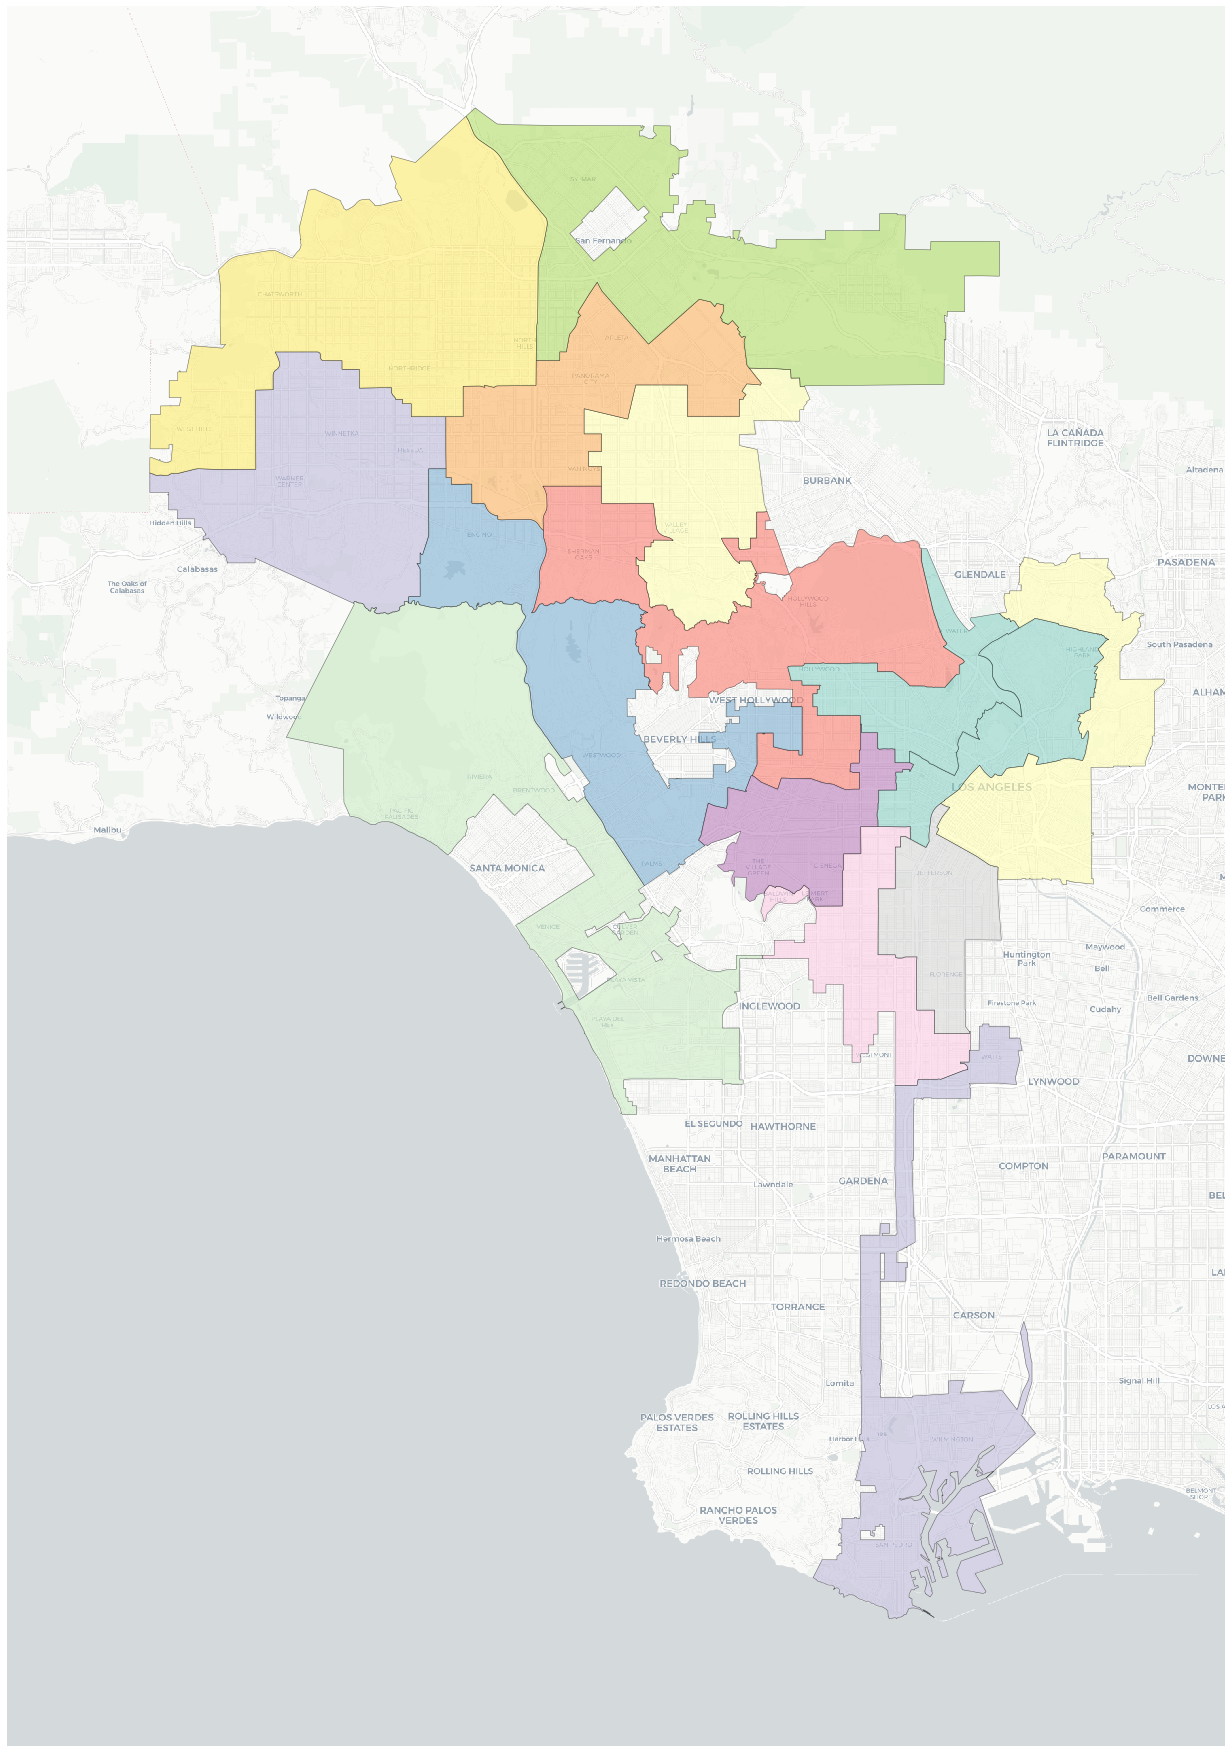

In [123]:
fig, ax = plt.subplots(figsize=(32,32))

ax.imshow(bgimg, extent=ext)
ax.axis('off')
districts.to_crs(3857).plot(ax=ax, color=colors, alpha=0.6, linewidth=0.5, edgecolor='k');

In [125]:
districts.dist_name

0             1 - Gilbert Cedillo
1              2 - Paul Krekorian
2             3 - Bob Blumenfield
3                   4 - David Ryu
4                 5 - Paul Koretz
5               6 - Nury Martinez
6            7 - Monica Rodriguez
7     8 - Marqueece Harris-Dawson
8         9 - Curren D. Price Jr.
9         10 - Herb J. Wesson Jr.
10                11 - Mike Bonin
11                  12 - John Lee
12           13 - Mitch O'Farrell
13               14 - Jose Huizar
14              15 - Joe Buscaino
Name: dist_name, dtype: object

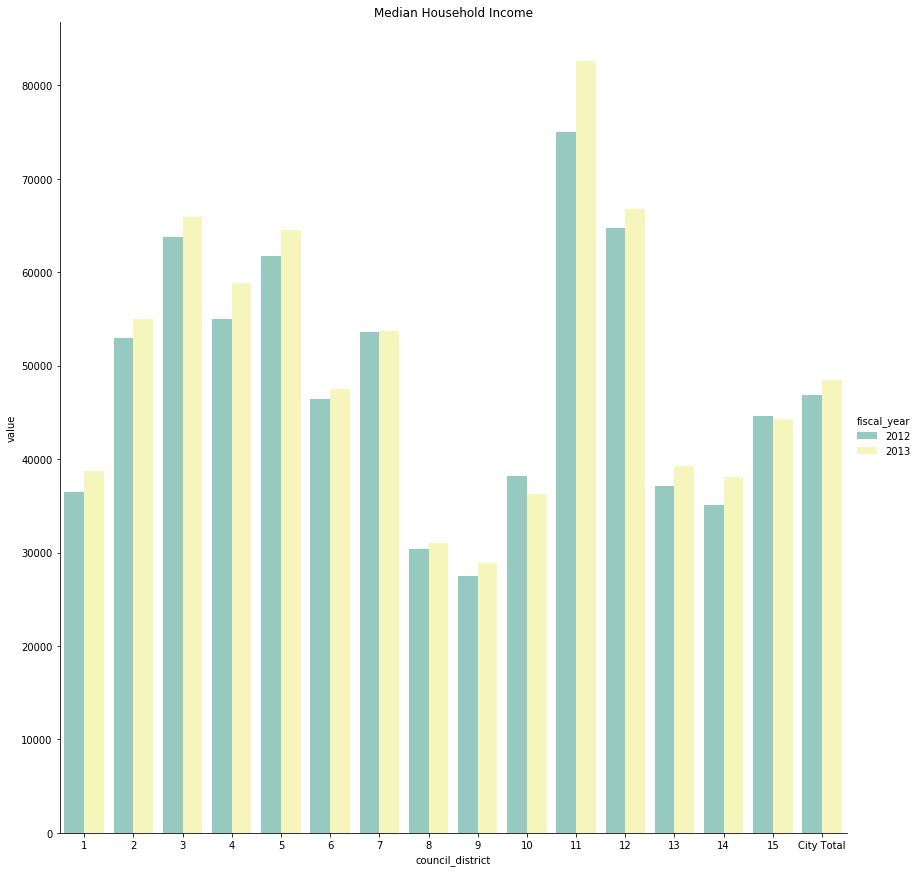

In [158]:
with sns.color_palette(colors):
    g=sns.catplot(kind='bar', y='value', x='council_district', hue='fiscal_year', data=dfs['Median Household Income'], height=12)
    g.ax.set_title('Median Household Income')

In [149]:
dfs['Median Household Income'].groupby('council_district').value.describe()
dfs['Median Household Income'].columns

Index(['category', 'indicator', 'locality', 'gender', 'council_district',
       'fiscal_year', 'as_of_date', 'unit_of_measure', 'value', 'source',
       'CD #'],
      dtype='object')

In [ ]:
for cat, data in df.sortby('fiscal_year').groupby('indicator'):
    print('**{} - {}** {}'.format(data.fiscal_year.min(), data.fiscal_year.max(), cat))

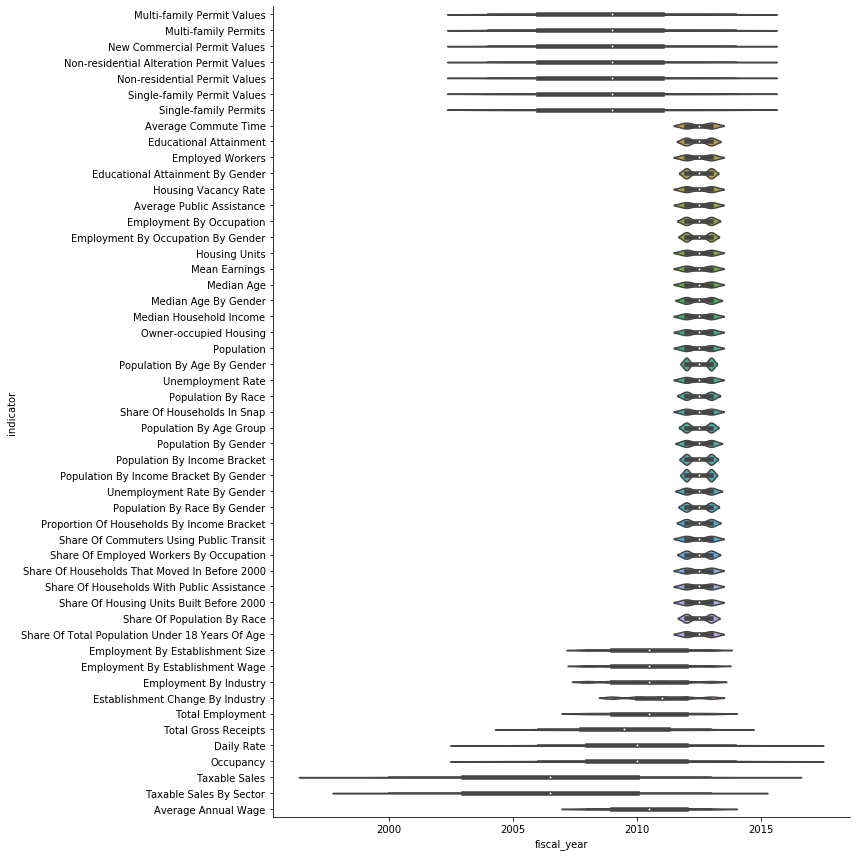

In [176]:
sns.catplot(kind='violin', y='indicator', x='fiscal_year', data=df, height=12)

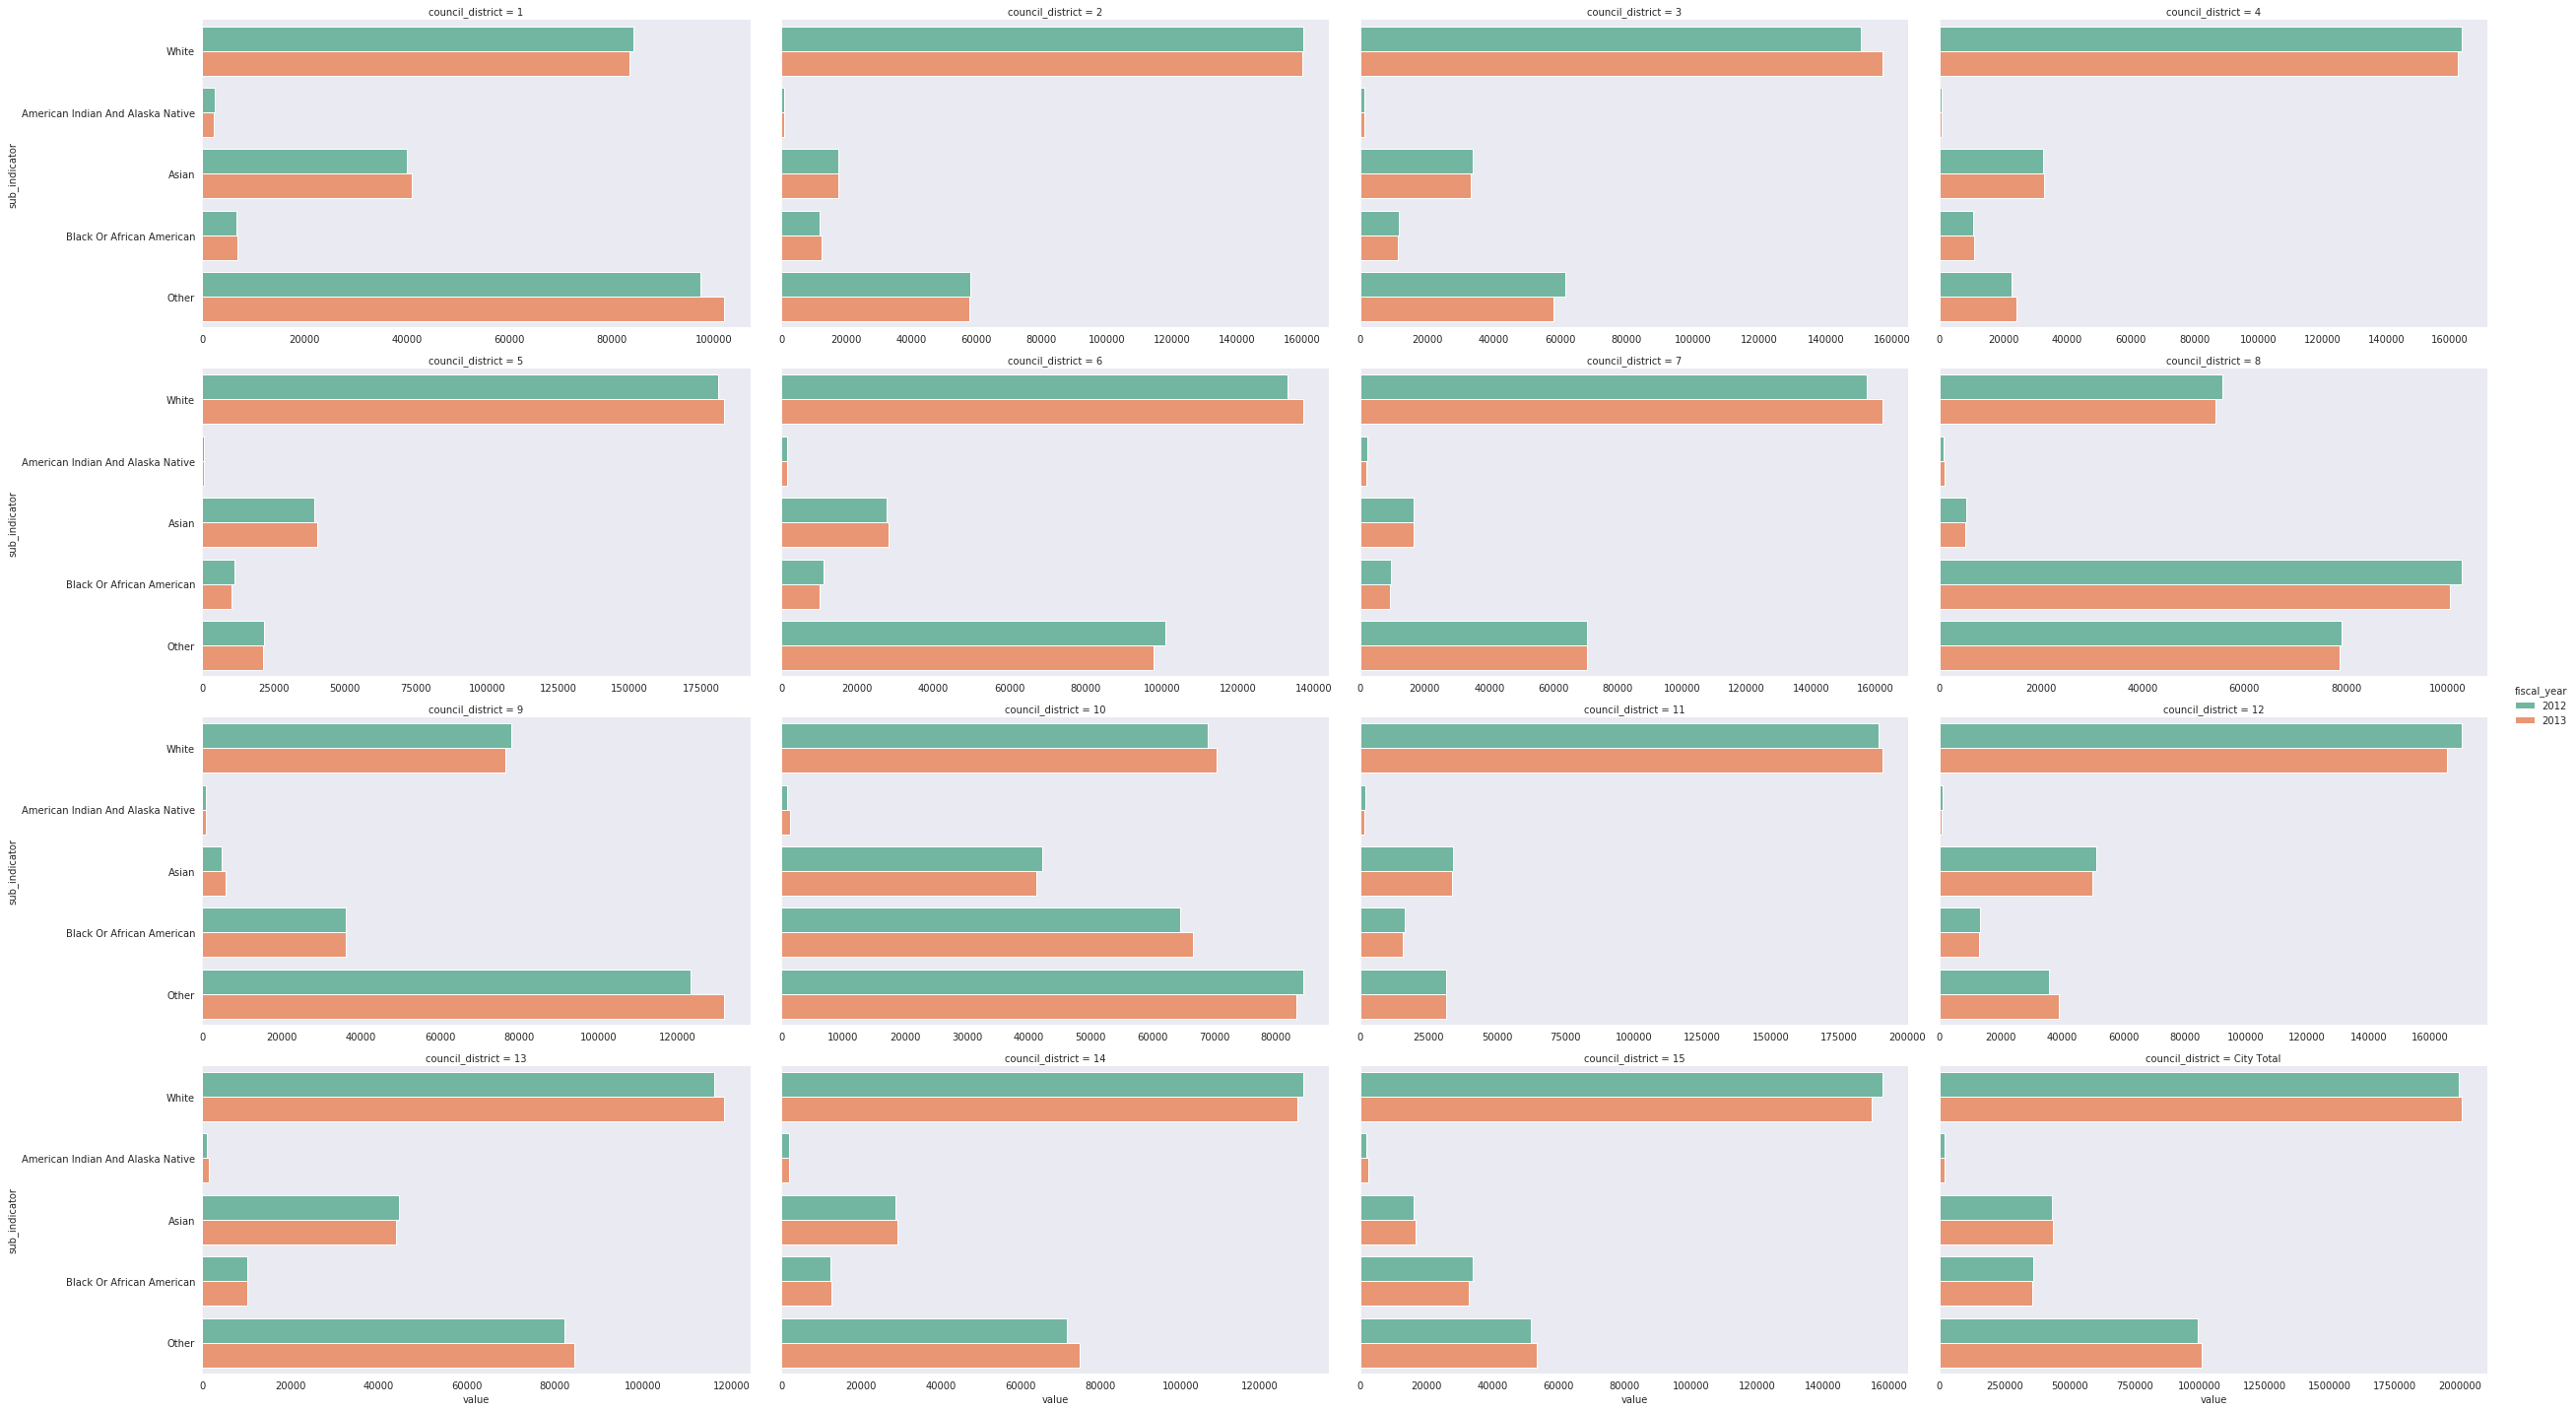

In [206]:
sns.set_style('dark')
sns.catplot(kind='bar', x='value', y='sub_indicator', hue='fiscal_year', orient='h', col='council_district', col_wrap=4,
            aspect=16/9, palette='Set2',
            sharex=False, sharey=True,
            data=dfs['Population By Race'])

In [202]:
dfs['Population By Race']

,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,as_of_date,unit_of_measure,value,source,CD #
7614,Demographics,Population By Race,White,Los Angeles City,All,1,2012,05/08/2015,#,84224.6,U.s. Census Bureau; Beacon Economics,1.0
11050,Demographics,Population By Race,American Indian And Alaska Native,Los Angeles City,All,1,2013,05/08/2015,#,2301.8,U.s. Census Bureau; Beacon Economics,1.0
11051,Demographics,Population By Race,American Indian And Alaska Native,Los Angeles City,All,1,2012,05/08/2015,#,2377.2,U.s. Census Bureau; Beacon Economics,1.0
11052,Demographics,Population By Race,Asian,Los Angeles City,All,1,2013,05/08/2015,#,40989.9,U.s. Census Bureau; Beacon Economics,1.0
11053,Demographics,Population By Race,Asian,Los Angeles City,All,1,2012,05/08/2015,#,39949.9,U.s. Census Bureau; Beacon Economics,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11204,Demographics,Population By Race,Black Or African American,Los Angeles City,All,City Total,2012,05/08/2015,#,361876.0,U.s. Census Bureau; Beacon Economics,NaN
11205,Demographics,Population By Race,Other,Los Angeles City,All,City Total,2013,05/08/2015,#,1008005.0,U.s. Census Bureau; Beacon Economics,NaN
11206,Demographics,Population By Race,Other,Los Angeles City,All,City Total,2012,05/08/2015,#,991622.0,U.s. Census Bureau; Beacon Economics,NaN
11207,Demographics,Population By Race,White,Los Angeles City,All,City Total,2013,05/08/2015,#,2006054.0,U.s. Census Bureau; Beacon Economics,NaN


In [215]:
df

,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source,CD #,Proportions
0,Building Permits,Multi-family Permit Values,NaN,Los Angeles City,All,1,2004,2004-03,2004.0,2004-01,01/01/2004,05/08/2015,$,Seasonally Adjusted And Smoothed,1311096.5,City Of Los Angeles Department Of Building And...,1.0,NaN
1,Building Permits,Multi-family Permit Values,NaN,Los Angeles City,All,1,2004,2004-04,2004.0,2004-02,04/01/2004,05/08/2015,$,Seasonally Adjusted And Smoothed,3081184.9,City Of Los Angeles Department Of Building And...,1.0,NaN
2,Building Permits,Multi-family Permit Values,NaN,Los Angeles City,All,1,2004,2005-01,2005.0,2004-03,07/01/2004,05/08/2015,$,Seasonally Adjusted And Smoothed,4150152.8,City Of Los Angeles Department Of Building And...,1.0,NaN
3,Building Permits,Multi-family Permit Values,NaN,Los Angeles City,All,1,2004,2005-02,2005.0,2004-04,10/01/2004,05/08/2015,$,Seasonally Adjusted And Smoothed,1288147.1,City Of Los Angeles Department Of Building And...,1.0,NaN
4,Building Permits,Multi-family Permit Values,NaN,Los Angeles City,All,1,2005,2005-03,2005.0,2005-01,01/01/2005,05/08/2015,$,Seasonally Adjusted And Smoothed,1971990.6,City Of Los Angeles Department Of Building And...,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30688,Wages,Average Annual Wage,NaN,Los Angeles City,All,City Total,2012,2013-02,2013.0,2012-04,10/01/2012,05/08/2015,$,NaN,57656.9,Employment Development Department,NaN,NaN
30689,Wages,Average Annual Wage,NaN,Los Angeles City,All,City Total,2013,2013-03,2013.0,2013-01,01/01/2013,05/08/2015,$,NaN,56582.4,Employment Development Department,NaN,NaN
30690,Wages,Average Annual Wage,NaN,Los Angeles City,All,City Total,2013,2013-04,2013.0,2013-02,04/01/2013,05/08/2015,$,NaN,56892.7,Employment Development Department,NaN,NaN
30691,Wages,Average Annual Wage,NaN,Los Angeles City,All,City Total,2013,2014-01,2014.0,2013-03,07/01/2013,05/08/2015,$,NaN,56261.5,Employment Development Department,NaN,NaN


In [224]:
df_copy=df.copy()
df_copy.set_index(pd.MultiIndex.from_tuples(('fiscal_year', 'council_district')))
#df.columns=.set_index()

ValueError: Length mismatch: Expected 25410 rows, received array of length 2

In [12]:
df20122013=df.pivot_table(columns=['indicator', 'sub_indicator'],
                            index=['fiscal_year', 'council_district'],
                            values=['value']).loc[pd.IndexSlice[2012:2013,],]

#df20122013.columns

In [ ]:
sns.pairplot(hue='fiscal_year', data=pd.DataFrame(df20122013.to_records()))

In [13]:
records=df20122013.to_records()
pd.DataFrame(records)

,fiscal_year,council_district,"('value', 'Educational Attainment', ""Bachelor's Degree"")","('value', 'Educational Attainment', 'High School')","('value', 'Educational Attainment By Gender', ""Associate's Degree"")","('value', 'Educational Attainment By Gender', ""Bachelor's Degree"")","('value', 'Educational Attainment By Gender', 'High School')","('value', 'Educational Attainment By Gender', 'Less Than High School')","('value', 'Educational Attainment By Gender', 'Some College')","('value', 'Employment By Establishment Size', '50 To 250 Employees')",...,"('value', 'Proportion Of Households By Income Bracket', '$50,000 To $100,000')","('value', 'Proportion Of Households By Income Bracket', 'Less Than $25,000')","('value', 'Proportion Of Households By Income Bracket', 'More Than $100,000')","('value', 'Share Of Population By Race', 'American Indian And Alaska Native')","('value', 'Share Of Population By Race', 'Asian')","('value', 'Share Of Population By Race', 'Black Or African American')","('value', 'Share Of Population By Race', 'Native Hawaiian And Other Pacific Islander')","('value', 'Share Of Population By Race', 'Other')","('value', 'Share Of Population By Race', 'White')","('value', 'Total Employment', 'Total All Industries')"
0,2012,1,17.066667,55.7,4107.066667,17913.600000,21802.000000,45541.200000,14842.866667,24222.775,...,19.5,42.8,9.1,397.9,41747.1,6201.7,238.2,1509.5,19465.4,93044.425
1,2012,10,24.066667,73.3,6086.800000,27265.733333,26400.000000,29927.733333,23555.400000,19625.400,...,23.2,38.0,10.9,296.2,39987.3,62626.8,103.5,6319.5,21843.4,67674.250
2,2012,11,60.600000,93.3,7223.600000,83873.733333,14435.200000,8856.533333,24156.733333,38486.550,...,28.3,16.0,39.6,272.4,34775.8,15426.0,90.5,10061.1,167954.8,152487.300
3,2012,12,42.033333,89.7,10865.333333,53303.400000,24361.933333,13585.266667,25628.133333,33985.250,...,30.6,16.0,33.9,522.8,53441.0,16138.0,582.8,9829.2,123722.8,99605.875
4,2012,13,27.866667,70.4,7373.200000,33929.133333,23612.733333,35834.066667,21311.800000,25120.850,...,23.4,38.2,11.7,537.0,43486.9,9450.2,48.6,5807.7,58541.6,93962.750
5,2012,14,23.100000,64.5,5555.200000,23926.266667,20441.666667,36565.600000,17186.866667,58326.425,...,25.2,37.2,15.2,98.6,23815.4,13140.0,334.6,2483.4,32029.4,320387.050
6,2012,15,16.233333,69.6,6518.000000,17259.066667,27400.600000,31556.733333,22769.600000,21141.400,...,27.4,29.6,16.7,685.8,16906.3,29990.4,1299.4,7141.4,39622.6,59441.225
7,2012,2,32.933333,78.3,7494.000000,39083.000000,24823.466667,25220.933333,21907.066667,17428.825,...,26.3,27.3,20.8,317.1,21384.4,10998.6,484.5,5040.6,103726.4,61970.375
8,2012,3,33.800000,82.4,8797.666667,38611.733333,24323.933333,19519.066667,22796.066667,29611.475,...,30.8,20.8,26.4,458.3,30746.6,10165.5,257.2,9429.2,101388.6,99586.250
9,2012,4,55.633333,93.2,8065.533333,72882.266667,15605.266667,8330.333333,25961.066667,31769.075,...,27.4,20.8,31.7,397.9,33918.9,12264.1,28.1,11008.8,153758.2,101964.075


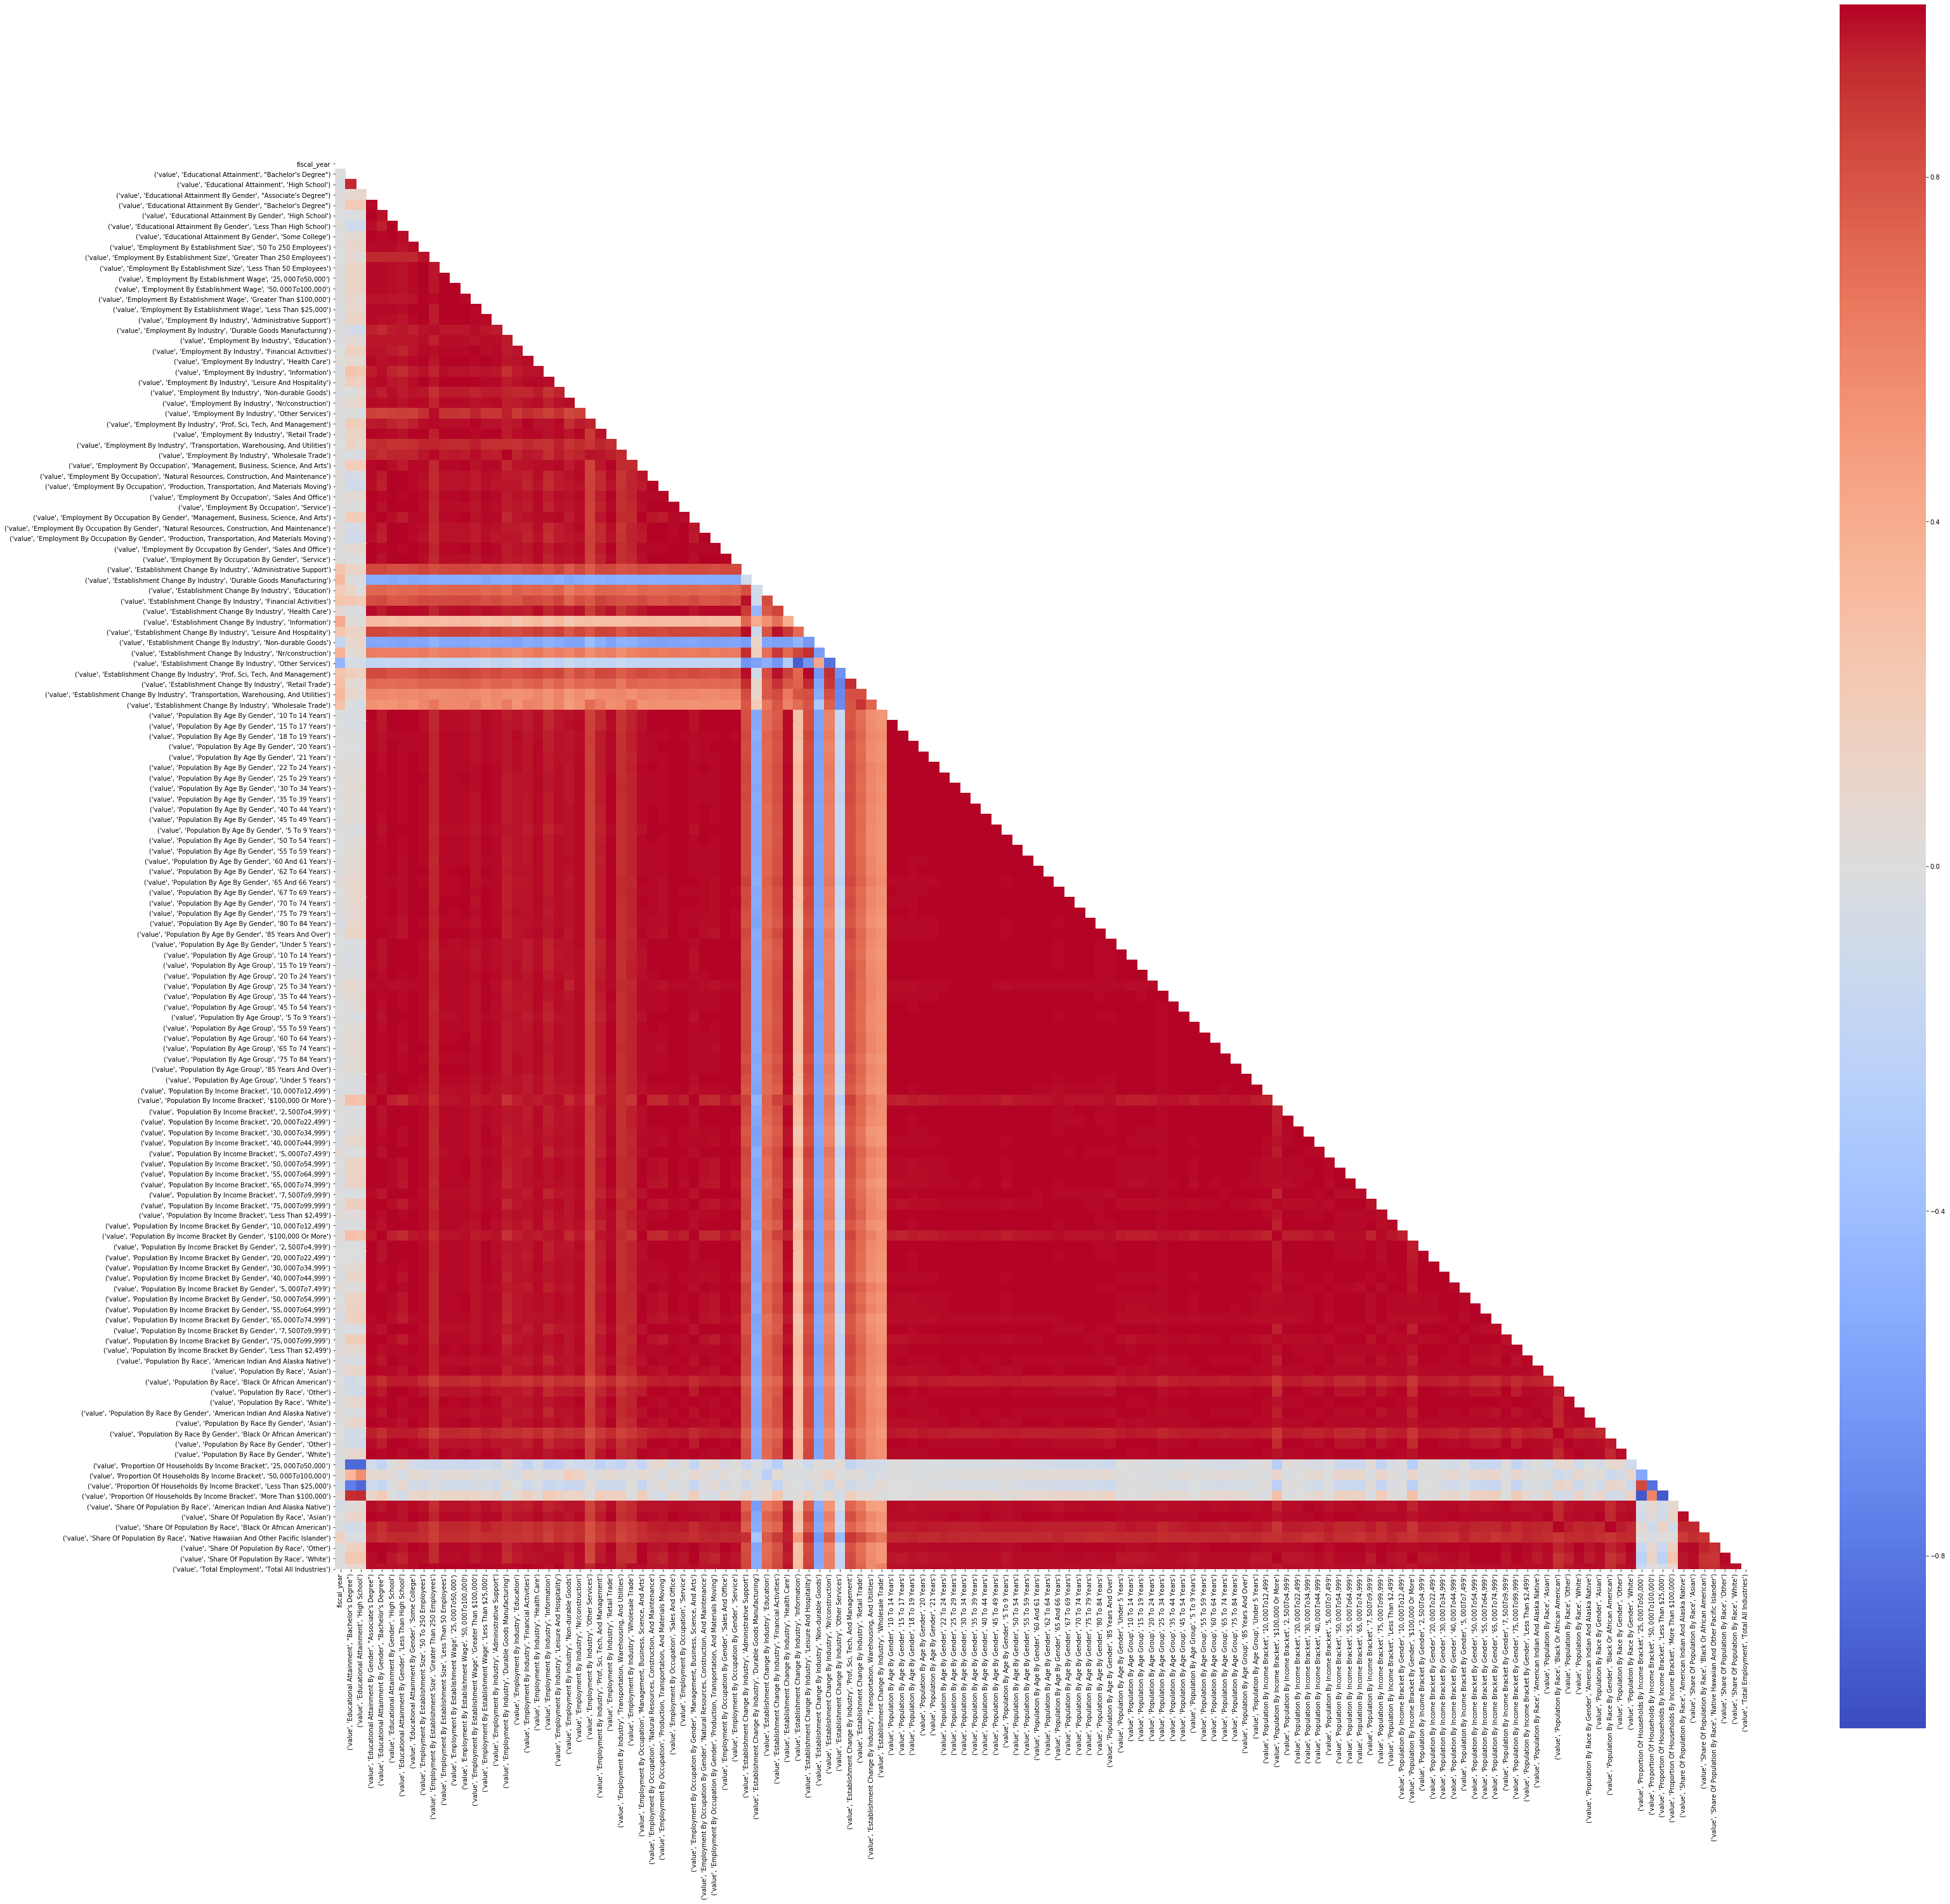

In [48]:
fig,ax = plt.subplots(figsize=(50,50))
corr=pd.DataFrame(records).corr()
mask=np.triu(np.ones(corr.shape))
sns.heatmap(corr, mask=mask, cmap='coolwarm', 
            center=0, vmin=-1, vmax=1,# annot=True, fmt='{:f}',
            square=True, ax=ax);

In [10]:
df.sample(10)

,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source,CD #,Proportions
27686,Employment,Total Employment,Total All Industries,Los Angeles City,All,4,2008,2009-01,2009.0,2008-03,07/01/2008,05/08/2015,#,Seasonally Adjusted,101498.8,"Employment Development Department, Beacon Econ...",4.0,NaN
18245,Employment,Employment By Industry,Durable Goods Manufacturing,Los Angeles City,All,6,2010,2011-01,2011.0,2010-03,07/01/2010,05/08/2015,#,Seasonally Adjusted,3495.5,"Employment Development Department, Beacon Econ...",6.0,NaN
10626,Demographics,Population By Income Bracket By Gender,"$55,000 To $64,999",Los Angeles City,Male,7,2013,NaN,NaN,NaN,NaN,05/08/2015,#,NaN,3136.2,U.s. Census Bureau; Beacon Economics,7.0,NaN
19327,Employment,Employment By Industry,Information,Los Angeles City,All,8,2011,2011-03,2011.0,2011-01,01/01/2011,05/08/2015,#,Seasonally Adjusted,89.9,"Employment Development Department, Beacon Econ...",8.0,NaN
14452,Employment,Employment By Establishment Wage,"$50,000 To $100,000",Los Angeles City,All,10,2012,2013-02,2013.0,2012-04,10/01/2012,05/08/2015,#,Seasonally Adjusted,5898.4,"Employment Development Department, Beacon Econ...",10.0,NaN
8425,Demographics,Population By Age By Gender,67 To 69 Years,Los Angeles County,Female,NaN,2013,NaN,NaN,NaN,NaN,05/08/2015,#,NaN,111116.0,U.s. Census Bureau; Beacon Economics,NaN,NaN
12811,Employment,Employment By Establishment Size,50 To 250 Employees,Los Angeles City,All,7,2010,2010-04,2010.0,2010-02,04/01/2010,05/08/2015,#,Seasonally Adjusted,16503.9,"Employment Development Department, Beacon Econ...",7.0,NaN
6589,Demographics,Employment By Occupation By Gender,Service,Los Angeles County,Male,NaN,2013,NaN,NaN,NaN,NaN,05/08/2015,#,NaN,408967.6,U.s. Census Bureau; Beacon Economics,NaN,NaN
10073,Demographics,Population By Income Bracket By Gender,"$2,500 To $4,999",Los Angeles City,Female,11,2013,NaN,NaN,NaN,NaN,05/08/2015,#,NaN,2087.1,U.s. Census Bureau; Beacon Economics,11.0,NaN
29350,Taxable Sales,Taxable Sales By Sector,Food Services And Drinking Places,Los Angeles City,All,NaN,2008,2009-02,2009.0,2008-04,10/01/2008,05/08/2015,$,"Thousands, Seasonally Adjusted",1413314.3,Board Of Equalization,NaN,NaN


In [89]:
df.iloc[np.where(df.indicator == 'Establishment Change By Industry')]

,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source,CD #,Proportions
17513,Employment,Establishment Change By Industry,Administrative Support,Los Angeles County,All,NaN,2002,2002-03,2002.0,2002-01,01/01/2002,05/08/2015,#,NaN,529.0,Quarterly Census Of Employment And Wages,NaN,NaN
19421,Employment,Establishment Change By Industry,Administrative Support,Los Angeles County,All,NaN,2002,2002-04,2002.0,2002-02,04/01/2002,05/08/2015,#,NaN,428.0,Quarterly Census Of Employment And Wages,NaN,NaN
19490,Employment,Establishment Change By Industry,Administrative Support,Los Angeles County,All,NaN,2002,2003-01,2003.0,2002-03,07/01/2002,05/08/2015,#,NaN,262.0,Quarterly Census Of Employment And Wages,NaN,NaN
19604,Employment,Establishment Change By Industry,Administrative Support,Los Angeles County,All,NaN,2002,2003-02,2003.0,2002-04,10/01/2002,05/08/2015,#,NaN,193.0,Quarterly Census Of Employment And Wages,NaN,NaN
19650,Employment,Establishment Change By Industry,Administrative Support,Los Angeles County,All,NaN,2003,2003-03,2003.0,2003-01,01/01/2003,05/08/2015,#,NaN,131.0,Quarterly Census Of Employment And Wages,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27607,Employment,Establishment Change By Industry,Wholesale Trade,Los Angeles County,All,NaN,2013,2014-01,2014.0,2013-03,07/01/2013,05/08/2015,#,NaN,475.0,Quarterly Census Of Employment And Wages,NaN,NaN
27608,Employment,Establishment Change By Industry,Wholesale Trade,Los Angeles County,All,NaN,2013,2014-02,2014.0,2013-04,10/01/2013,05/08/2015,#,NaN,335.0,Quarterly Census Of Employment And Wages,NaN,NaN
27609,Employment,Establishment Change By Industry,Wholesale Trade,Los Angeles County,All,NaN,2014,2014-03,2014.0,2014-01,01/01/2014,05/08/2015,#,NaN,855.0,Quarterly Census Of Employment And Wages,NaN,NaN
27610,Employment,Establishment Change By Industry,Wholesale Trade,Los Angeles County,All,NaN,2014,2014-04,2014.0,2014-02,04/01/2014,05/08/2015,#,NaN,891.0,Quarterly Census Of Employment And Wages,NaN,NaN


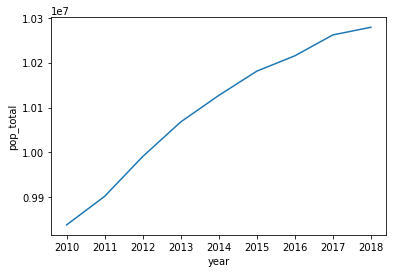

In [48]:
population=pd.read_csv('data/population-estimates-and-projections-by-county-age-and-sex-california-1970-2050.csv')
population=population.iloc[np.where(population.county == 'LOS ANGELES')]
population=population.pivot_table(index=['year'], values=['pop_total'], aggfunc=sum).loc[2010:2018]

#.year, list(population.pop_total.items())
sns.lineplot(x='year', y='pop_total', data=population.reset_index())



In [69]:
from functools import reduce  

df.iloc[np.where( (df.indicator == 'Population') & (df['CD #'] >= 1) )].pivot_table(index=['CD #'], values=['value'], aggfunc=lambda i: reduce(lambda a,b: b-a, i))

,value
CD #,
1.0,-2595.2
2.0,-8042.0
3.0,8623.9
4.0,-3077.3
5.0,14151.7
6.0,-17517.4
7.0,-9182.0
8.0,12331.5
9.0,11857.5
